In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# load the data
data = pd.read_csv('pacific.csv')
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [21]:
data.Status = pd.Categorical(data.Status)
data['Status'] = data.Status.cat.codes
data.tail()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
26132,EP222015,SANDRA,20151128,1200,,5,21.7N,109.0W,35,1002,...,0,0,0,0,0,0,0,0,0,0
26133,EP222015,SANDRA,20151128,1800,,5,22.4N,108.7W,30,1007,...,0,0,0,0,0,0,0,0,0,0
26134,EP222015,SANDRA,20151129,0,,5,23.1N,108.3W,30,1008,...,0,0,0,0,0,0,0,0,0,0
26135,EP222015,SANDRA,20151129,600,,5,23.5N,107.9W,25,1009,...,0,0,0,0,0,0,0,0,0,0
26136,EP222015,SANDRA,20151129,1200,,5,24.2N,107.7W,20,1010,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# get rid of the unwanted columns
pred_columns = data[:]
pred_columns.drop(['Status', 'Event', 'Latitude', 'Longitude', 'Date', 'Time',
                  'ID', 'Name'],axis=1, inplace=True)
prediction_var = pred_columns.columns
list(prediction_var)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


['Maximum Wind',
 'Minimum Pressure',
 'Low Wind NE',
 'Low Wind SE',
 'Low Wind SW',
 'Low Wind NW',
 'Moderate Wind NE',
 'Moderate Wind SE',
 'Moderate Wind SW',
 'Moderate Wind NW',
 'High Wind NE',
 'High Wind SE',
 'High Wind SW',
 'High Wind NW']

In [23]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.5, random_state=15)
print(train.shape)
print(test.shape)

(13068, 22)
(13069, 22)


In [24]:
# extract relevant columns from the full data
train_X = train[prediction_var]
train_Y = train['Status']

#test
test_X = test[prediction_var]
test_Y = test['Status']

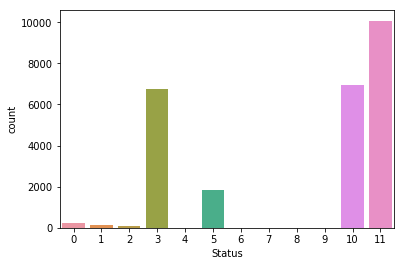

In [25]:
import seaborn as sns
sns.countplot(data['Status'], label='count of disturbances')


In [26]:
# use the model now
gnb = GaussianNB()
gnb.fit(train_X, train_Y)

# testing
predicted_gnb = gnb.predict(test_X)
#measure the performance
accuracy_score(test_Y, predicted_gnb)

0.30308363302471497

In [27]:
# confusion matrix
cnf_matrix_gnb = confusion_matrix(test_Y, predicted_gnb)
cnf_matrix_gnb

array([[ 104,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,   83,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           2],
       [   7,   19,    0,    0,    0,    2,    0,    2,    2,    0,   23,
           0],
       [   0, 1765,    0, 1491,    0,    0,    0,    0,    0,    0,    0,
         114],
       [   0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0],
       [ 835,   10,    3,    0,    0,    0,    4,    9,    9,    0,   58,
           0],
       [   1,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   2,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    4,    0,    0,
           0],
       [   0,    0,    0,    2,    0,    0,    0,    0,    0,    2,    0,
           0],
       [ 572, 1811,    2,    0,    0,    0,    0,    5,    1,    0, 1111,
           0],
       [   0, 2658,  

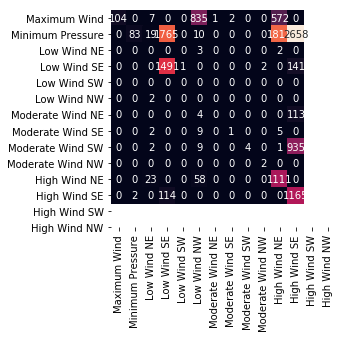

In [31]:
# let's put this in more presentable format
sns.heatmap(cnf_matrix_gnb.T,
            square=True,
            annot=True,
            fmt='d',
            cbar=False,
            xticklabels=prediction_var,
            yticklabels=prediction_var)

# what is confusion matrix ?
A confusion matrix is a summary of prediction results on a classification 
problem...


distinguish between cats, dogs and rabbits
27 animals: 8cats, 6dogs, 13rabbits

                            Actual classes
                          Cat    Dog    Rabbit
Predicted Classes   cat    5      2       0
                    Dog    3      3       2
                    Rabbit 0      1       11
                    
 In cat' context
 
                     Actual class
Predicted class      Cat                 Non-cat
                Cat   5 True positive    2 False positive
            Non-Cat    3 False Negative  17 True negative
## Definition of terms:
- Positive: Observation is +ve
- negative : observation  is -ve
- True positive(TP) : Observation(real) is +ve and is predicted to be positive
- False negative(FN): Observation(real) is positive but prediction is -ve
- True negative TN: Observation(real) is -ve but prediction is -ve
- False positive: Observation(real) is -ve but prediction is +ve
